# 教師なし学習

## Q1. 類似度（1/2）（ユークリッド距離とコサイン類似度）
下2次元のユークリッド空間上に，13個のデータ点が図のように分布している状況を考える（各点の座標については，下記コードのリストdataに収められている）．

N次元空間上の任意の点$v_1$，$v_2$が与えられたとき，$v_1$と$v_2$のユークリッド距離を求める関数calc_euclidean_dist(v1, v2)，コサイン類似度を求める関数calc_cosine_sim(v1, v2)を実装せよ．さらに，下図の13つの点のすべての組み合わせについて，そのユークリッド距離とコサイン類似度を求めよ．

なお，実装する関数の第1引数および第2引数は，実数のリストを想定せよ．

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('ticks')
%matplotlib inline

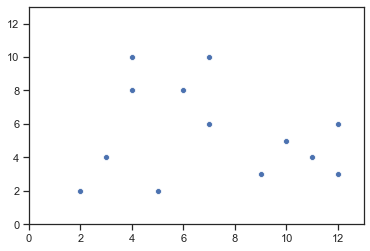

In [3]:
data = [(2, 2), (3, 4), (5, 2), (10, 5), (9, 3),
        (11, 4), (12, 3), (12, 6), (4, 10), (4, 8),
        (6, 8), (7, 10), (7, 6)]

xs, ys = zip(*data) # zipの逆操作

# 可視化
ax = sns.scatterplot(x=xs, y=ys)
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
plt.show()

In [4]:
import math

def calc_euclidean_dist(v1: list, v2: list):
    """
    Args:
        v1(list): 任意の点(n1, n2, ..., nn) 
        v2(list): 任意の点(n1, n2, ..., nn)
    Returns:
        euclidean_dist(float): 2点間のユークリッド距離
    """

    temp = 0
    for f1, f2 in zip(v1, v2):
        temp += (f1 - f2) ** 2
    return math.sqrt(temp)

def calc_cosine_sim(v1, v2):
    """
    Args:
        v1(list): 任意の点(n1, n2, ..., nn) 
        v2(list): 任意の点(n1, n2, ..., nn)
    Returns:
        euclidean_dist(float): 2点間のコサイン類似度
    """

    temp_ab = 0
    temp_a = 0
    temp_b = 0

    for f1, f2 in zip(v1, v2):
        temp_ab += f1 * f2
        temp_a += f1 ** 2
        temp_b = f2 ** 2
        return temp_ab / math.sqrt(temp_a) * math.sqrt(temp_b)


In [5]:
euclidean_dict ={}
cosine_dict = {}
for i in range(len(data)):
    for j in range(i, len(data)):
        if i != j:
            euclidean_dict[data[i], data[j]] = calc_euclidean_dist(data[i], data[j])
            cosine_dict[data[i], data[j]] = calc_cosine_sim(data[i], data[j])


In [6]:
print('ユークリッド距離')
euclidean_dict

ユークリッド距離


{((2, 2), (3, 4)): 2.23606797749979,
 ((2, 2), (5, 2)): 3.0,
 ((2, 2), (10, 5)): 8.54400374531753,
 ((2, 2), (9, 3)): 7.0710678118654755,
 ((2, 2), (11, 4)): 9.219544457292887,
 ((2, 2), (12, 3)): 10.04987562112089,
 ((2, 2), (12, 6)): 10.770329614269007,
 ((2, 2), (4, 10)): 8.246211251235321,
 ((2, 2), (4, 8)): 6.324555320336759,
 ((2, 2), (6, 8)): 7.211102550927978,
 ((2, 2), (7, 10)): 9.433981132056603,
 ((2, 2), (7, 6)): 6.4031242374328485,
 ((3, 4), (5, 2)): 2.8284271247461903,
 ((3, 4), (10, 5)): 7.0710678118654755,
 ((3, 4), (9, 3)): 6.082762530298219,
 ((3, 4), (11, 4)): 8.0,
 ((3, 4), (12, 3)): 9.055385138137417,
 ((3, 4), (12, 6)): 9.219544457292887,
 ((3, 4), (4, 10)): 6.082762530298219,
 ((3, 4), (4, 8)): 4.123105625617661,
 ((3, 4), (6, 8)): 5.0,
 ((3, 4), (7, 10)): 7.211102550927978,
 ((3, 4), (7, 6)): 4.47213595499958,
 ((5, 2), (10, 5)): 5.830951894845301,
 ((5, 2), (9, 3)): 4.123105625617661,
 ((5, 2), (11, 4)): 6.324555320336759,
 ((5, 2), (12, 3)): 7.0710678118654755

In [7]:
print('コサイン類似度')
cosine_dict

コサイン類似度


{((2, 2), (3, 4)): 9.0,
 ((2, 2), (5, 2)): 25.0,
 ((2, 2), (10, 5)): 100.0,
 ((2, 2), (9, 3)): 81.0,
 ((2, 2), (11, 4)): 121.0,
 ((2, 2), (12, 3)): 144.0,
 ((2, 2), (12, 6)): 144.0,
 ((2, 2), (4, 10)): 16.0,
 ((2, 2), (4, 8)): 16.0,
 ((2, 2), (6, 8)): 36.0,
 ((2, 2), (7, 10)): 49.0,
 ((2, 2), (7, 6)): 49.0,
 ((3, 4), (5, 2)): 25.0,
 ((3, 4), (10, 5)): 100.0,
 ((3, 4), (9, 3)): 81.0,
 ((3, 4), (11, 4)): 121.0,
 ((3, 4), (12, 3)): 144.0,
 ((3, 4), (12, 6)): 144.0,
 ((3, 4), (4, 10)): 16.0,
 ((3, 4), (4, 8)): 16.0,
 ((3, 4), (6, 8)): 36.0,
 ((3, 4), (7, 10)): 49.0,
 ((3, 4), (7, 6)): 49.0,
 ((5, 2), (10, 5)): 100.0,
 ((5, 2), (9, 3)): 81.0,
 ((5, 2), (11, 4)): 121.0,
 ((5, 2), (12, 3)): 144.0,
 ((5, 2), (12, 6)): 144.0,
 ((5, 2), (4, 10)): 16.0,
 ((5, 2), (4, 8)): 16.0,
 ((5, 2), (6, 8)): 36.0,
 ((5, 2), (7, 10)): 49.0,
 ((5, 2), (7, 6)): 49.0,
 ((10, 5), (9, 3)): 81.0,
 ((10, 5), (11, 4)): 121.0,
 ((10, 5), (12, 3)): 144.0,
 ((10, 5), (12, 6)): 144.0,
 ((10, 5), (4, 10)): 16.0,
 ((10, 5)

## Q2. 類似度（2/2）（類似度の解釈）
Q1で扱ったデータ集合において，点$v=(11, 4)$との最も類似する点（最近傍点）を求めたい．ユークリッド空間の各次元の意味，最近傍点の定義が下記のような設定である場合，点の類似性を評価する関数としてユークリッド距離，コサイン類似度のどちらを用いるのが適切か考察しながら，最近傍点を求めよ．

1. 各点は都市の位置情報を表しており，第1次元は「緯度」，第2次元は「経度」を意味する．最近傍点として，**物理的距離が近い都市**を見つけたいケース．
2. 各点はユーザの購買傾向を表しており，第1次元は「ジャンルAに属する商品を購入した回数」，第2次元は「ジャンルBに属する商品を購入した回数」を意味する．最近傍点として，**購買傾向が似ているユーザ**を見つけたいケース．

In [64]:
print('case 1')

dists = {}

for i in range(0, len(data)):
    for d in data:
        if d != (11, 4):
            dists[d] = calc_euclidean_dist((11, 4), d)
print(sorted(dists.items(), key=lambda x:x[1])[1])


case 1
((12, 3), 1.4142135623730951)


In [65]:
print('case 2')

sims = {}

for i in range(0, len(data)):
    for d in data:
        if d != (11, 4):
            sims[d] = calc_cosine_sim((11, 4), d)
print(sorted(sims.items(), key=lambda x:x[1])[-1])


case 2
((12, 6), 144.0)


## Q3. K-means（1/3）（実装）

Q1で扱った13個のデータ点について，K-means法を用いて3つのクラスタに分割したい．

K-means法は，N個のデータ集合$D=\{x_1, x_2, ..., x_n\}$が与えられたとき，以下の手順でデータ集合をK個のクラスタに分割する：

1. データ集合からランダムにK個のデータを選択し，それぞれをクラスタ中心（centroid）とする．
2. データ集合$D$中の各データ$d \in D$について，K個のクラスタ中心との距離を比較し，最も距離が小さいクラスタにデータ$d$を割り当てる．
3. 各クラスタに属するデータの重心（平均）をクラスタ中心として更新する．
4. 各クラスタに割り当てられるデータが変化しなくなるまで，2と3の処理を繰り返す．

上記手順に従ってK-means法を実装し，対象データを3つのクラスタに分割せよ．

なお，この課題では``sklearn``ライブラリ等のクラスタリングメソッドを用いないこと．また，データ間の距離の計算にはユークリッド距離を用いよ．

In [68]:
import pandas

def find_nearest_centroid(data, centroids):
    """
    Args:
        data(list): 任意の点
        centroids(list(list(int))): 任意の点のリスト
    Returns:
        nearest_centrooid(list): 最も近いクラスタ中心
    """
    return sorted(centroids, key=lambda x:calc_euclidean_dist(x, data))[0]


def calc_center(data):
    """
    Args:
        data(list): 任意の点のリスト
    Returns:
        center(list): 重心
    """

    temp_x = 0
    temp_y = 0
    for d in data:
        temp_x += d[0]
        temp_y += d[1]

    # TODO Handl ZeroDivisionError
    return (temp_x/len(data), temp_y/len(data))

    # TODO n次元に対応
    """
    temp_frame = pandas.DataFrame()
    for cluster in clusters.values():
        for c in cluster:
            #print(c, pandas.DataFrame(c))
            temp_frame = pandas.DataFrame(columns=range(len(c)))
            #print(pandas.DataFrame([*c], columns=[range(len(c))]))
            temp_frame.append(pandas.DataFrame([*c], columns=[range(len(c))]))
        print(temp_frame)
    """    


In [49]:
import random

def k_means(data, centroids):
    """
    Args:
        data(list): クラスタリング対象のデータ
        centroids(list): k個のクラスタの中心点
    Returns:
        classes(dict): {'中心点': クラスタリングされた点のリスト}
    """

    clusters = {}
    for c in centroids:
        clusters[c] = list()

    for d in data:
        if d not in centroids:
            clusters[find_nearest_centroid(d, centroids)].append(d)

    new_centroids = [calc_center(c) for c in clusters.values()]

    if centroids != new_centroids:
        k_means(data, new_centroids)
    else:
        print(clusters)
        return clusters

    
centroids = random.sample(data, 3)
k_means(data, centroids)

{(5.6, 8.4): [(4, 10), (4, 8), (6, 8), (7, 10), (7, 6)], (3.3333333333333335, 2.6666666666666665): [(2, 2), (3, 4), (5, 2)], (10.8, 4.2): [(10, 5), (9, 3), (11, 4), (12, 3), (12, 6)]}


### Q4. K-means（2/3）（初期値）
Q4で実装したK-means法は，クラスタ中心の初期値をランダムに割り当てているため，初期値によってはクラスタリングの結果が大きく変わってしまうことがある．この問題を回避するために，様々なアプローチが提案されている．KKZ法はクラスタ中心の初期化手法の1つであり，「最も距離が離れているデータ同士を初期値クラスタ中心を選択する」というものである．KKZ法の具体的な手順は以下の通りである：

1. 与えられたデータ集合$D$からデータ同士の距離が最大となる2つのデータを選択する．それら2つを初期のクラスタ中心$c1$，$c2$とする．
2. 初期のクラスタ中心として選ばれていない各データについて，既に選ばれている各クラスタ中心との距離を計算し，その最小値を保存しておく．
3. ステップ2で計算した値が最大となるデータ$d$を初期のクラスタ中心として追加する．
4. 初期のクラスタ中心がK個（クラスタ分割数）になるまで，ステップ2および3を繰り返す．

KKZ法によって初期クラスタ中心を選択する関数``find_initial_centroids``を実装し，Q4で実装したK-means法を改良せよ．

In [50]:
def calc_euclidean_dist_match(data):
    """
    Args:
        data(list): 対象データのリスト
    Returns:
        euclidean_dict(dict): ユークリッド距離の組み合わせ
    """
    euclidean_dict ={}
    for i in range(len(data)):
        for j in range(i, len(data)):
            if i != j:
                euclidean_dict[data[i], data[j]] = calc_euclidean_dist(data[i], data[j])
    return euclidean_dict


In [82]:
def find_initial_centroids(data, k):
    matches = calc_euclidean_dist_match(data)
    init_centroids = list(sorted(matches.items(), key=lambda x:x[1])[-1:][0][0])
    
    while len(init_centroids) != k:
        remaining = list(filter(lambda x:x not in init_centroids, data))
        init_centroids.append(sorted(remaining, key=lambda x:find_nearest_centroid(x,init_centroids))[-1])

    return init_centroids

print(find_initial_centroids(data, 3))

[(2, 2), (12, 6), (7, 6)]
